# Create a Facetgrid Plot For a Single Band
Each band in a remote sensing time series can be stored in a Xarray data array. The band time series can be stacked to produce an Xarray dataset. Creating a facetgrid plot of the time series for a band is achieved by applying the `.plot()` method to the associated data array with the parameter `col='time'`. This function uses the Matplotlib library, although it is not necessary to import Matplotlib separately for basic plotting. For more complex plotting, it is necessary to import the pyplot function from Matplotlib.

## Setup
Import the Xarray, then open the dataset. The time series for each of the four data variables can be plotted by applying `.plot()`. 

In [2]:
import xarray as xr

In [3]:
ds = xr.open_dataset('Data/netCDF/ds_BM_NP.nc')
ds

<xarray.Dataset>
Dimensions:      (time: 36, y: 200, x: 170)
Coordinates:
  * y            (y) float64 4.466e+06 4.466e+06 ... 4.447e+06 4.447e+06
  * x            (x) float64 9.604e+06 9.604e+06 9.604e+06 ... 9.62e+06 9.62e+06
    spatial_ref  int32 ...
  * time         (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2020-12-31
Data variables:
    nbart_red    (time, y, x) float32 ...
    nbart_blue   (time, y, x) float32 ...
    nbart_green  (time, y, x) float32 ...
    nbart_nir_1  (time, y, x) float32 ...
Attributes:
    crs:           EPSG:3308
    grid_mapping:  spatial_ref

## Create a Basic Plot
A variable needs to be extracted from the dataset by using `.variable_name` before plotting. A spatial plot for each time step in the dataset will be created. Since this dataset has 36 time steps, it is more practical to plot a selection of the data. For this exercise we will plot the nbart_red band for the period from September 2019 to Februray 2020. Notice the parameter `col='time'` in the plot function call. This tells Xarray to create a spatial plot along the time dimension. Calling `.plot()` without the `col` parameter will result in a histogram in this case.

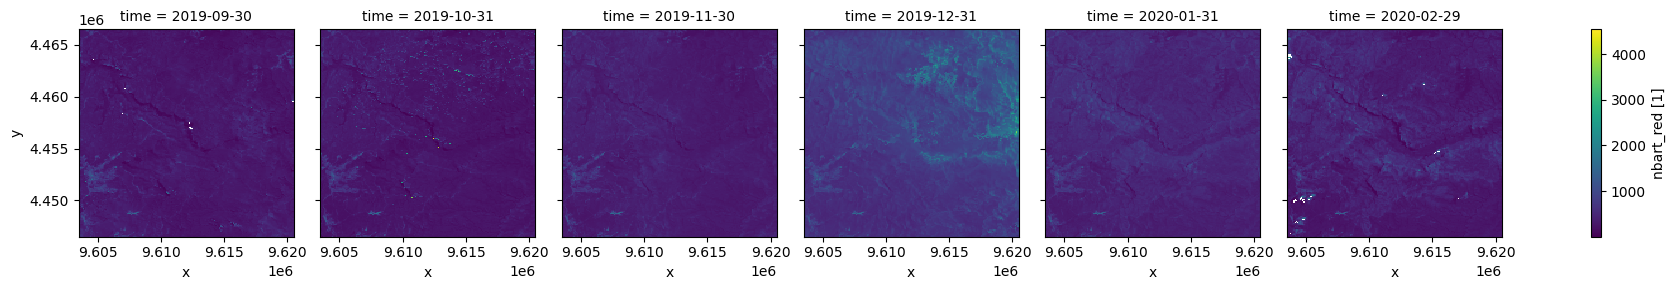

In [6]:
ds.nbart_red.sel(time=slice('2019-09', '2020-02')).plot(col='time')

Calling `.plot()` without `col='time'` produces the following histogram.

(array([1.30356e+05, 6.21020e+04, 9.64000e+03, 1.57000e+03, 2.39000e+02,
        3.00000e+01, 6.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([1.00000000e+00, 4.54950012e+02, 9.08900024e+02, 1.36284998e+03,
        1.81680005e+03, 2.27075000e+03, 2.72469995e+03, 3.17864990e+03,
        3.63260010e+03, 4.08655005e+03, 4.54050000e+03]),
 <BarContainer object of 10 artists>)

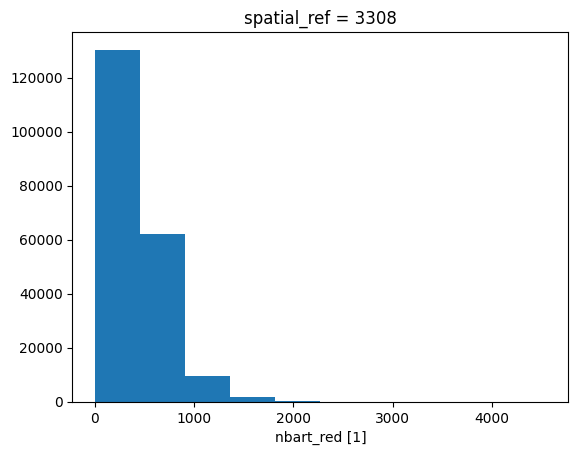

In [8]:
ds.nbart_red.sel(time=slice('2019-09', '2020-02')).plot()

## Plot Adjustments

### Enhancing Colour Differences When There Are Outliers
We notice from the facetgrid plot that most of the pixels are coloured at the low end of the colorbar scale. The histogram indicates that this effect is caused by the right-skew of the data. Most of the values in the dataset are between 0 and 1000, with some extreme values above 2000. Outliers can be removed from the colorbar scale calculation by using the parameter `robust=True`.

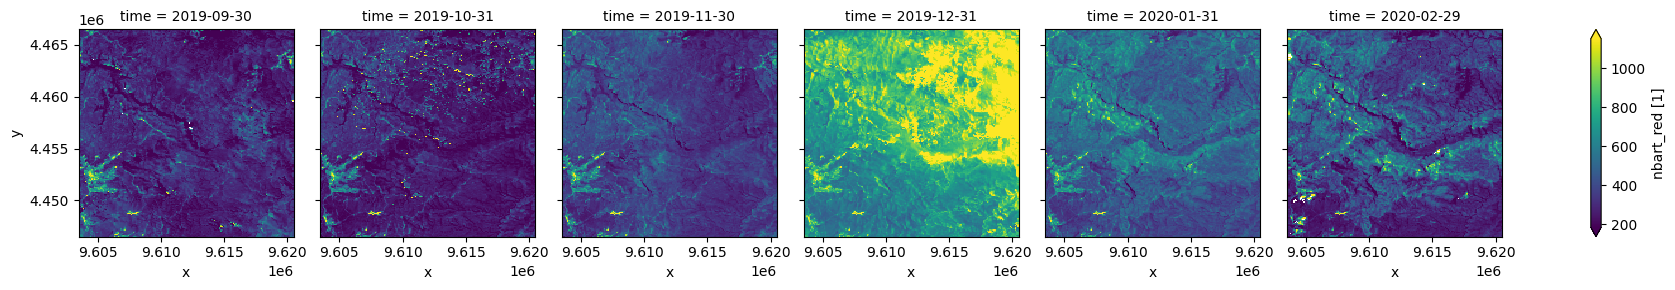

In [9]:
ds.nbart_red.sel(time=slice('2019-09', '2020-02')).plot(col='time', robust=True)

Notice that the colorbar now has a much smaller range, allowing smaller differences between pixels to stand out. 

### Setting the Number of Columns in the Facetgrid
If we were to plot twelve time steps instead of six, the individual plots would become squeezed to fit into one row, making the plots too small or distorted to be useful. The solution is to use the `col_wrap` parameter. In the next example, twelve months are plotted in a 4x3 grid. By selecting the start month carefully, each row will represent one season.

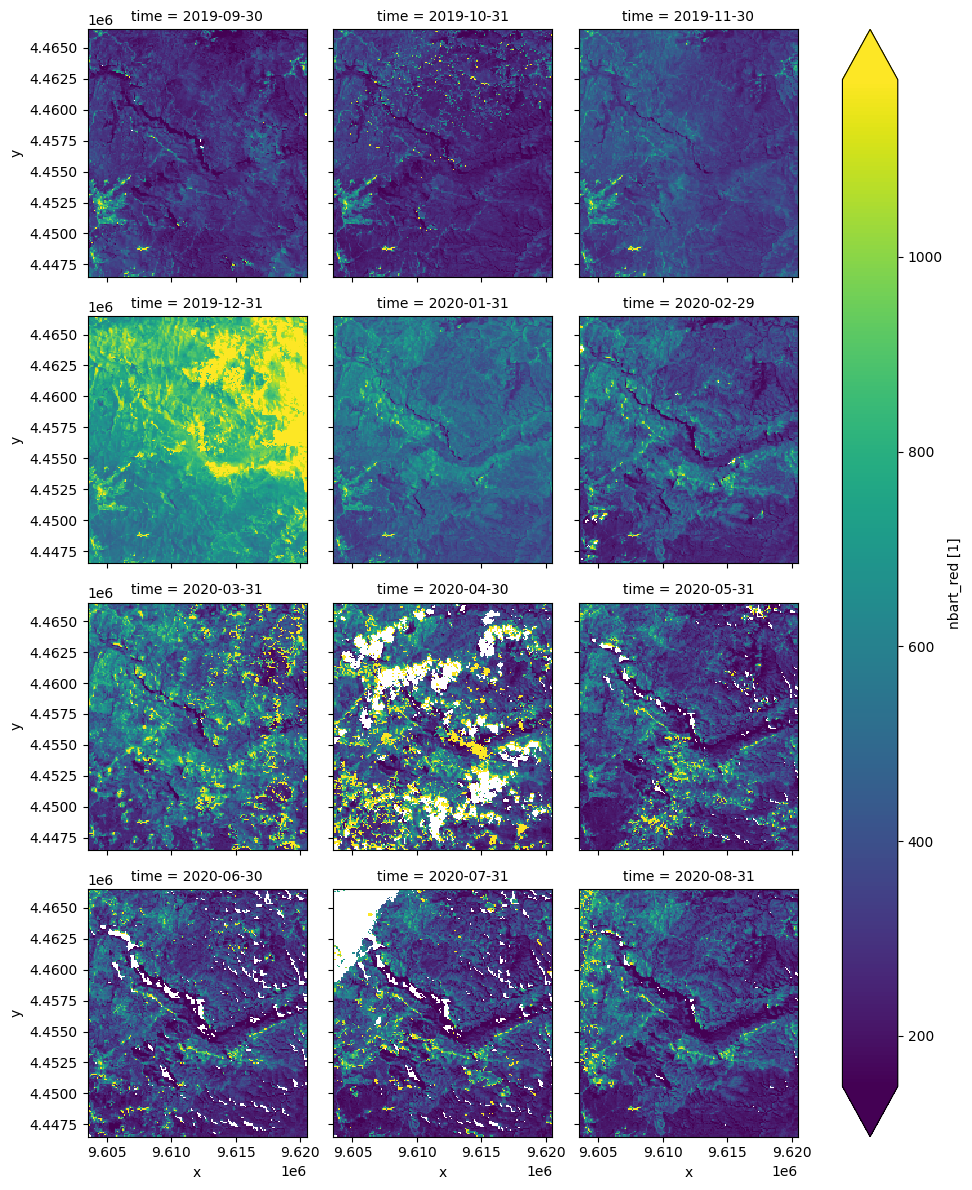

In [10]:
ds.nbart_red.sel(time=slice('2019-09', '2020-08')).plot(col='time', robust=True, col_wrap=3)

### Choose a Colormap
The colours used in a facetgrid plot are controlled using the `cmap` parameter. Matplotlib has a large range of in-built colormaps to choose from (see [Matplotlib Colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html#classes-of-colormaps)). The next example shows two plots which differ only by their colormaps.

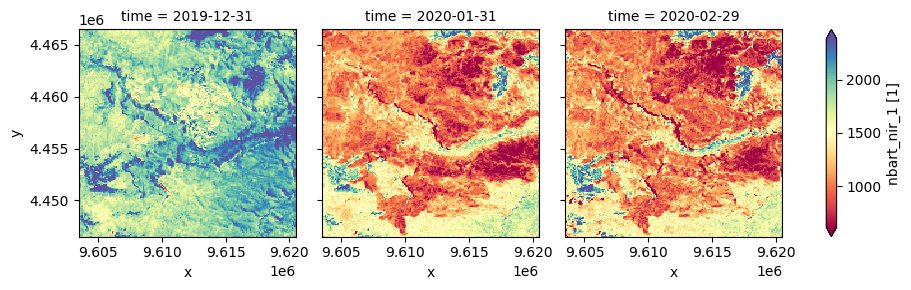

In [9]:
ds.nbart_nir_1.sel(time=slice('2019-12', '2020-02')).plot(col='time', robust=True, cmap='Spectral')

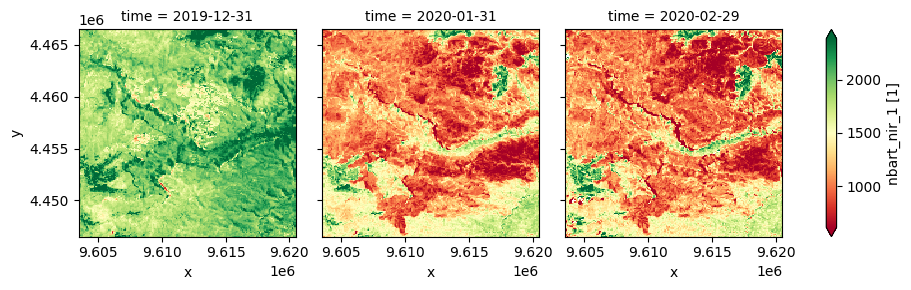

In [8]:
ds.nbart_nir_1.sel(time=slice('2019-12', '2020-02')).plot(col='time', robust=True, cmap='RdYlGn')

## Zoom in on a Region of Interest
We can take a closer look at a region of interest in our study area by selecting a slice of the x and y coordinates. This is easy to achieve using the `.sel()` method for a data array. See [Select Data Using .sel() and .isel()](Select_Data_Using_sel()_and_isel().ipynb) for more details about selecting data. The example below zooms in on the central part of the study area.

### Notes
1. The plot origin is at the top left. Slice the y-coordinates from the top down.
2. The $1e6$ on the axes indicates the use of scientific notation. For example, $1e6=1 \times 10^6$, and $9.61e6 = 9.61 \times 10^6$.

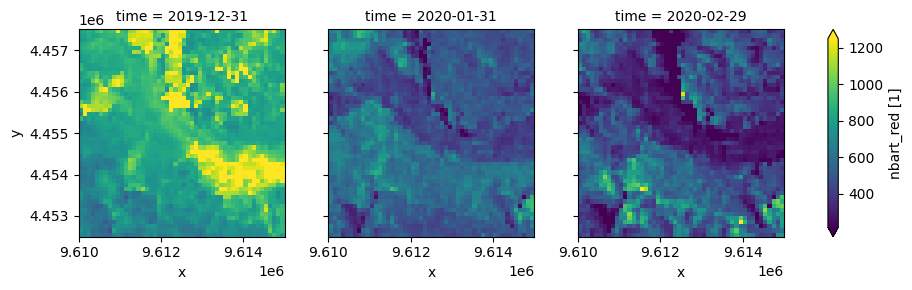

In [7]:
(ds.nbart_red.sel(time=slice('2019-12','2020-02'), x=slice(9.61e6,9.615e6), y=slice(4.4575e6, 4.4525e6))
.plot(col='time', robust=True)
)

## Further Reading
* See the [Read and Write a netCDF File](Read_and_Write_a_netCDF_File.ipynb) notebook for more detail on Xarray data structures.
* See [Plotting](https://docs.xarray.dev/en/stable/user-guide/plotting.html) in the Xarray documentation.